#Data Pre-Processing

# Part 1:Data Pre Processing

DataSet Link =  https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers?select=Churn_Modelling.csv

# Importing Libraries and Data Sets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn_datasets = pd.read_csv('/content/Churn_Modelling.csv')

# Data Exploration

In [ ]:
churn_datasets.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_datasets.shape

(10000, 14)

In [ ]:
churn_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_datasets.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
churn_datasets.select_dtypes(include=['int64', 'float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
#statistical summary
churn_datasets.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Dealing with Missing Values

In [ ]:
churn_datasets.isnull().values.any()

False

In [ ]:
churn_datasets.isnull().values.sum()

0

Encode the categorial Data

In [ ]:
churn_datasets.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
churn_datasets.drop(columns = ['Surname', 'RowNumber', 'CustomerId'], inplace=True)

In [ ]:
churn_datasets.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_datasets['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
churn_datasets['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
churn_datasets.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [ ]:
churn_datasets.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


# Encoding Categorical Data

In [ ]:
#one hot encoding
churn_datasets = pd.get_dummies(data=churn_datasets, drop_first=True)

In [ ]:
churn_datasets.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# CountPlot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


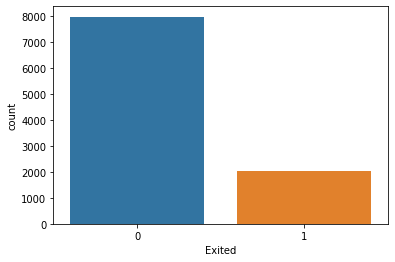

In [ ]:
sns.countplot(churn_datasets['Exited'])
plt.show()

In [ ]:
#Staying wiht the bank
(churn_datasets.Exited == 0).sum()

7963

In [ ]:
#Exited Customers
(churn_datasets.Exited == 1).sum()

2037

# Ciorrelation Matrix and HeatMaps

In [ ]:
churn_datasets2 = churn_datasets.drop(columns= 'Exited')

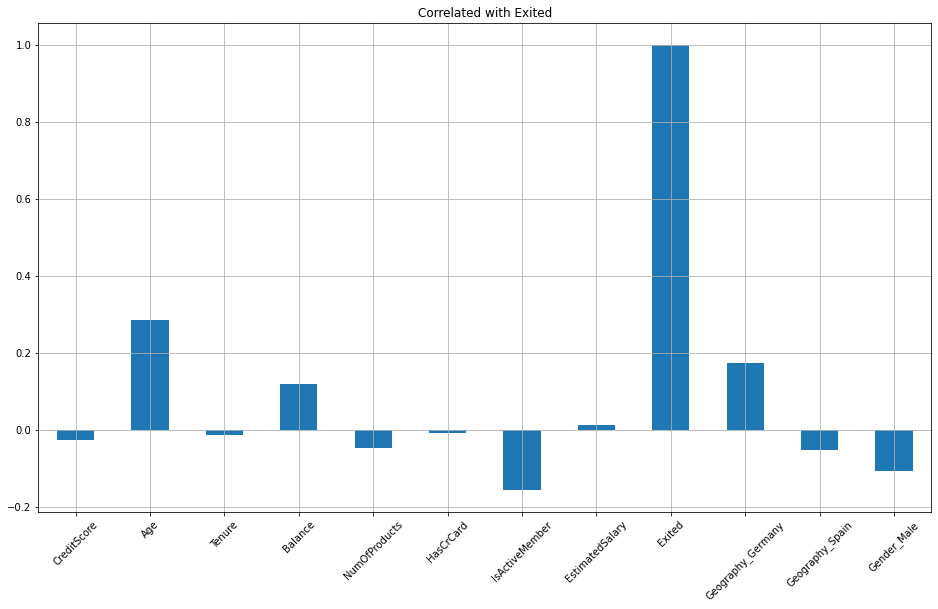

In [ ]:
churn_datasets.corrwith(churn_datasets['Exited']).plot.bar(figsize=(16,9), title='Correlated with Exited', 
                                                           rot=45, grid=True)

In [ ]:
corr = churn_datasets.corr()

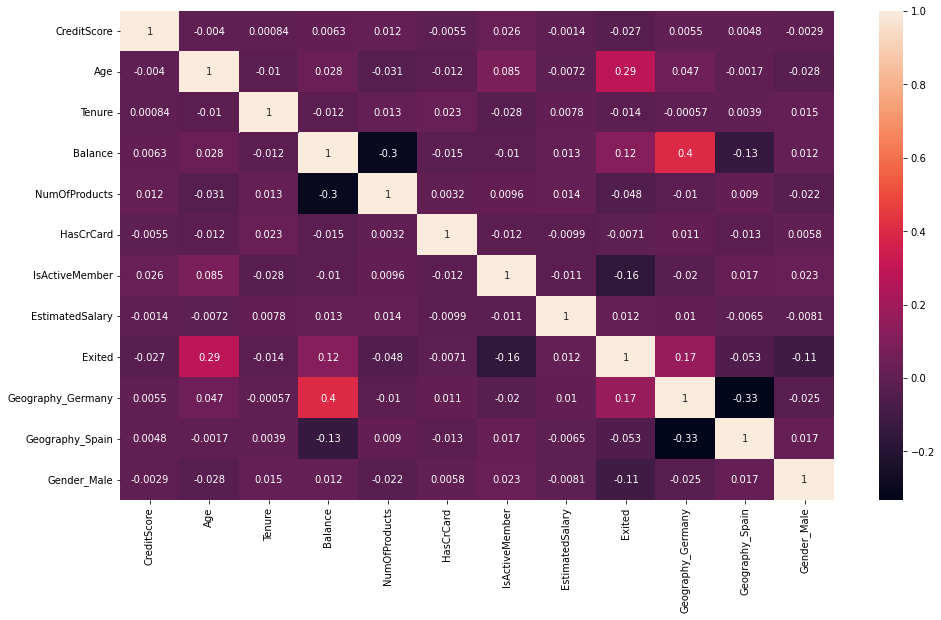

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True)

# Splitting Data Sets 

In [ ]:
churn_datasets.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
#Independant Variables/ Matrix of features
x = churn_datasets2

In [ ]:
#target/Dependent Varibale
y= churn_datasets['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
x_train.shape

(6700, 11)

In [ ]:
x_test.shape

(3300, 11)

In [ ]:
y_train.shape

(6700,)

In [ ]:
y_test.shape

(3300,)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Building Model

1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state=0)
classifier_LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier_LR.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]], 
                       columns=(['Model', 'Accuracy Score', 'F1_Score', 'precision', 'Recall']))

In [ ]:
results

,Model,Accuracy Score,F1_Score,precision,Recall
0,Logistic Regression,0.811515,0.29955,0.542857,0.206843


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2545,  112],
       [ 510,  133]])

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator=classifier_LR, X=x_train, y=y_train, cv=10)

In [ ]:
accuracies.mean() * 100
accuracies.std() * 100

1.2037847791898042

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier_rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

In [ ]:
model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]], 
                       columns=(['Model', 'Accuracy Score', 'F1_Score', 'precision', 'Recall']))

In [ ]:
results = results.append(model_results, ignore_index=True)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2565,   92],
       [ 337,  306]])

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator=classifier_LR, X=x_train, y=y_train, cv=10)
accuracies.mean() * 100
accuracies.std() * 100

1.2037847791898042

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier_xgb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


In [ ]:
model_results = pd.DataFrame([['XG Boost Model', acc, f1, prec, rec]], 
                       columns=(['Model', 'Accuracy Score', 'F1_Score', 'precision', 'Recall']))

In [ ]:
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy Score,F1_Score,precision,Recall
0,Logistic Regression,0.811515,0.299550,0.542857,0.206843
1,Random Forest,0.870000,0.587896,0.768844,0.475894
2,XG Boost Model,0.868182,0.585319,0.756158,0.477449


In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[2558,   99],
       [ 336,  307]])

# Randomised Search Algorith for XGBoost Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameter = {'Learning Rate' : [0.05,0.1, 0.15, 0.20, 0.25,0.30],
             'max_depth' :[1,6,7,12,56],
             'min_child_weight' : [1,3,5,7],
             'gamma' : [0.0, 0.1, 0.2, 0.3, 0.4],
             'colsample_bytree' : [0.3,0.4,0.5,0.6,0.7]

    

}

In [ ]:
random_search_cv =RandomizedSearchCV(estimator=classifier_xgb, param_distributions=parameter, n_iter=5, n_jobs=-1,
                                     scoring='roc_auc', cv=5, verbose=3)

In [ ]:
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [ ]:
random_search_cv.best_estimator_

XGBClassifier(Learning Rate=0.1, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              gamma=0.1, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search_cv.best_params_

In [ ]:
random_search_cv.best_score_

0.8574783658257379

# Final Mode ; XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Final XGBoost', acc, f1, prec, rec]], 
                       columns=(['Model', 'Accuracy Score', 'F1_Score', 'precision', 'Recall']))


results = results.append(model_results, ignore_index=True)
results


,Model,Accuracy Score,F1_Score,precision,Recall
0,Logistic Regression,0.811515,0.299550,0.542857,0.206843
1,Random Forest,0.870000,0.587896,0.768844,0.475894
2,XG Boost Model,0.868182,0.585319,0.756158,0.477449
3,Final XGBoost,0.871515,0.600000,0.762590,0.494557


In [ ]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[2558,  325],
       [  99,  318]])

## Final Prediction

In [ ]:
churn_datasets.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
